In [1]:
from pathlib import Path

import matplotlib.pyplot as mplt
import pandas as pn
import seaborn as sb

In [2]:
# project configuration
DATA_PATH = Path("vgsales.csv")

In [3]:
# Loading the dataset
ds = pn.read_csv(DATA_PATH)

# Displaying the first few rows of the dataset
ds.head()

,Rank,Name,Platform,Date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,7/4/2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,4/19/1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,11/9/2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,8/7/2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,5/13/1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Checking for missing values
missing_values = ds.isnull().sum()

# Displaying the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Rank              0
Name              0
Platform          0
Date            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [5]:
# Removing the rows with missing values
ds = ds.dropna()

# Checking for duplicates
duplicates = ds.duplicated()

# Displaying the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

# Removing duplicate rows
ds = ds.drop_duplicates()

Number of duplicate rows: 0


In [6]:
# Checking for outliers in the 'Global_Sales' column
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = ds["Global_Sales"].quantile(0.25)
Q3 = ds["Global_Sales"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = ds[
    (ds["Global_Sales"] < lower_bound) | (ds["Global_Sales"] > upper_bound)
]

# Displaying the outliers
print("Outliers in the 'Global_Sales' column:")
outliers

Outliers in the 'Global_Sales' column:


,Rank,Name,Platform,Date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,7/4/2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,4/19/1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,11/9/2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,8/7/2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,5/13/1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
1842,1844,Need for Speed: ProStreet,Wii,5/13/2007,Racing,Electronic Arts,0.54,0.46,0.00,0.12,1.11
1843,1845,Pikmin 3,WiiU,5/1/2013,Strategy,Nintendo,0.45,0.31,0.29,0.06,1.11
1844,1846,Legend of Mana,PS,11/2/1999,Role-Playing,SquareSoft,0.18,0.13,0.73,0.07,1.11
1845,1847,Lumines: Puzzle Fusion,PSP,4/3/2004,Puzzle,Ubisoft,0.52,0.35,0.00,0.23,1.11


In [7]:
# Get summary statistics for numerical columns
summary_stats = ds.describe()

# Export the cleaned and processed data to CSV for Tableau
ds.to_csv("processed_vgsales.csv", index=False)

# Display summary statistics to understand the distribution of the data
print("Summary Statistics:")
summary_stats

Summary Statistics:


,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


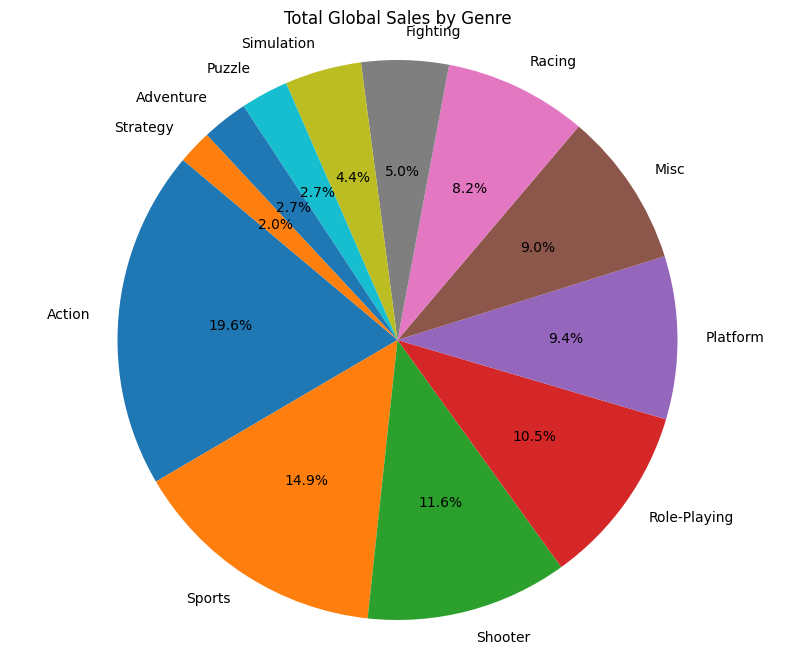

In [8]:
# Visualuzing a pie chart to find out games in which genre were sold the most
sales_by_genre = ds.groupby("Genre")["Global_Sales"].sum().reset_index()
sales_by_genre = sales_by_genre.sort_values(by="Global_Sales", ascending=False)
mplt.figure(figsize=(10, 8))
mplt.pie(sales_by_genre["Global_Sales"], labels=sales_by_genre["Genre"], autopct="%1.1f%%", startangle=140)
mplt.title("Total Global Sales by Genre")
mplt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
mplt.show()

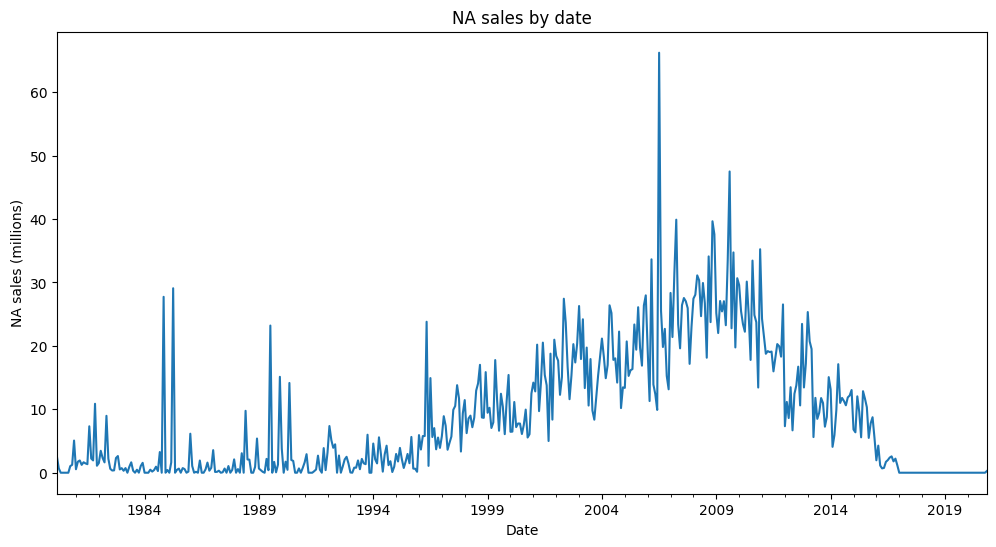

In [9]:
# Visualizing sales in North America by date
# Converting the 'Date' column to datetime format
ds["Date"] = pn.to_datetime(ds["Date"])

# Setting the 'Date' column as the index
ds.set_index("Date", inplace=True)

# Resampling by month and calculate the total sales for each month
monthly_sales = ds["NA_Sales"].resample("ME").sum()

# Plotting the monthly sales trend to visualize how sales change over time
mplt.figure(figsize=(12, 6))
monthly_sales.plot()
mplt.title("NA sales by date")
mplt.xlabel("Date")
mplt.ylabel("NA sales (millions)")
mplt.show()

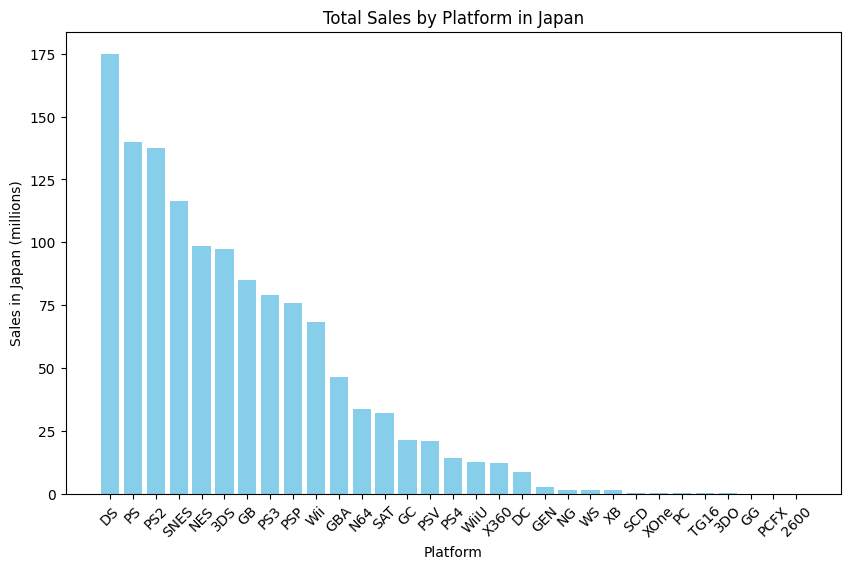

In [10]:
# Grouping the games sold by platform in Japan
category_sales = ds.groupby("Platform")["JP_Sales"].sum().reset_index()

# Sorting the sales
category_sales = category_sales.sort_values(by="JP_Sales", ascending=False)

# Ploting sales by product category to see which platfrom generate the most sales

mplt.figure(figsize=(10, 6))
mplt.bar(category_sales["Platform"], category_sales["JP_Sales"], color="skyblue")
mplt.xlabel("Platform")
mplt.ylabel("Sales in Japan (millions)")
mplt.title("Total Sales by Platform in Japan")
mplt.xticks(rotation=45)
mplt.show()

In [11]:
# Correlation matrix between Global, Japan and North America sales
sales = ds[["JP_Sales", "NA_Sales", "Global_Sales"]]

# Calculating the correlation matrix
correlation_matrix = sales.corr()
correlation_matrix

,JP_Sales,NA_Sales,Global_Sales
JP_Sales,1.000000,0.451283,0.612774
NA_Sales,0.451283,1.000000,0.941269
Global_Sales,0.612774,0.941269,1.000000


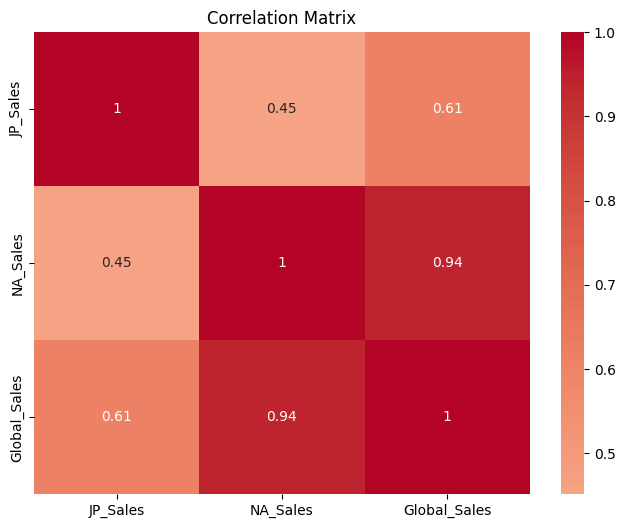

In [12]:
# Ploting the correlation matrix
mplt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
mplt.title("Correlation Matrix")
mplt.show()

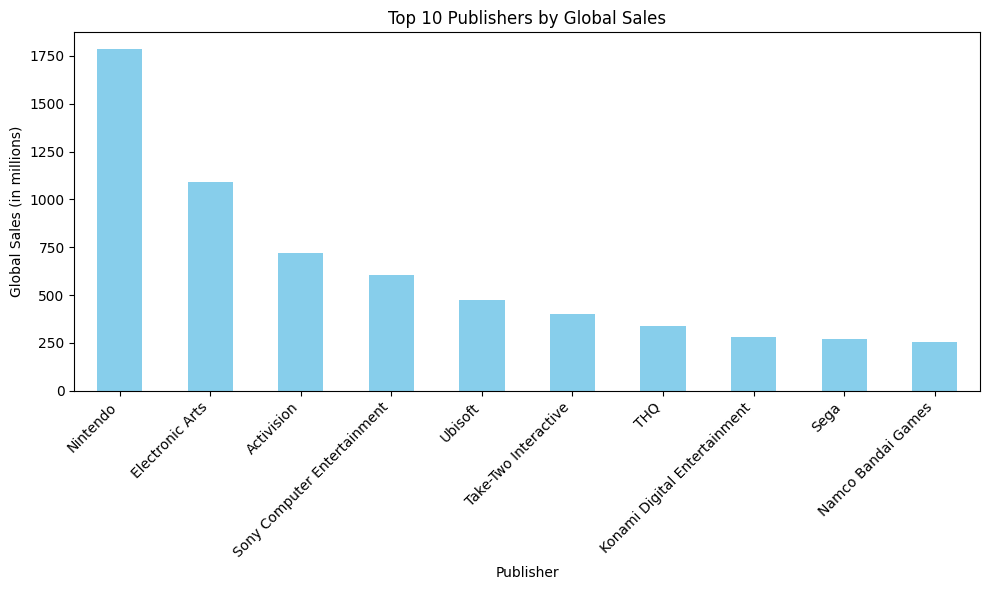

In [13]:

# Top publishers by global sales
top_publishers = ds.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Plotting the top publishers by global sales
mplt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar', color='skyblue')
mplt.title('Top 10 Publishers by Global Sales')
mplt.xlabel('Publisher')
mplt.ylabel('Global Sales (in millions)')
mplt.xticks(rotation=45, ha="right")
mplt.tight_layout()
mplt.show()


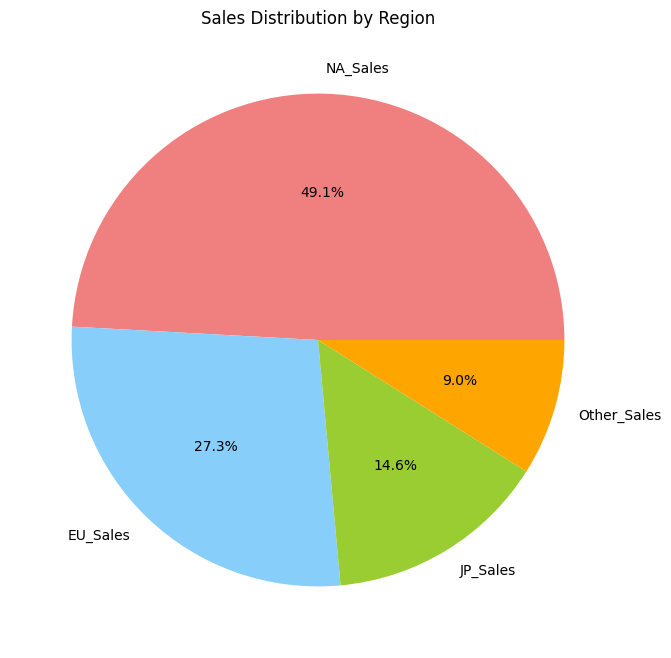

In [14]:

# Sales distribution by region
region_sales = ds[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plotting sales distribution by region
mplt.figure(figsize=(8, 8))
region_sales.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'yellowgreen', 'orange'])
mplt.title('Sales Distribution by Region')
mplt.ylabel('')  # Hide y-label
mplt.show()
